In [1]:
!pip install spacy transformers torch
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


🤖 Emotional Twin is listening. Type 'exit' to quit, or 'plot' to view mood chart.

You: I feel completely exhausted and under so much pressure.

Emotional Twin: I sense a negative tone (1.00). Currently feeling reserved. Consider taking a few deep breaths or doing something creative to ease your mind.

Truly, it's a very essential topic. naturally introspective but usually optimistic and calm

You: I’m so happy with my progress today — everything went smoothly.

Emotional Twin: I sense a positive tone (1.00). Currently feeling cheerful. That's wonderful! You might consider journaling what’s going well to build gratitude.

That’s interesting. Could you tell me more about what you're feeling or thinking?

You: plot


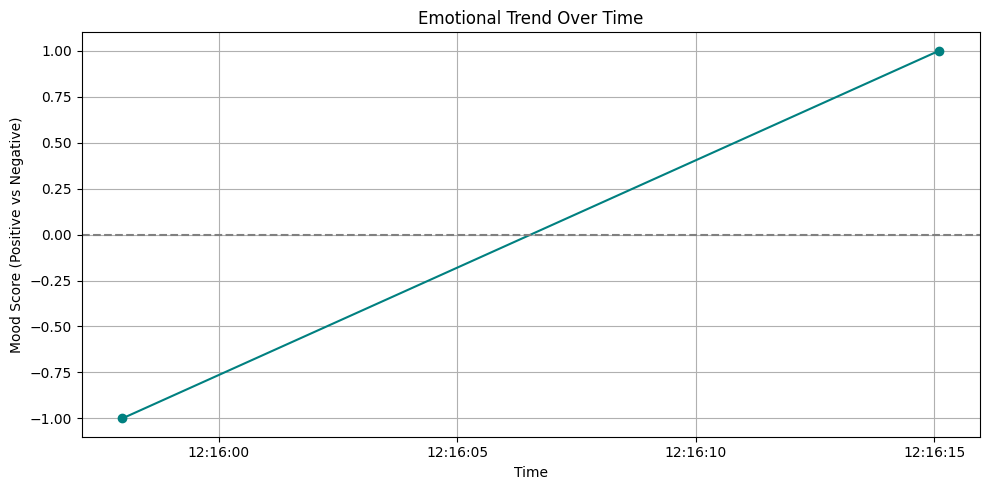

In [ ]:
import random
import json
import os
from datetime import datetime
import matplotlib.pyplot as plt
import spacy
from transformers import pipeline

# --- NLP & Sentiment Models ---
nlp = spacy.load("en_core_web_sm")
sentiment_analyzer = pipeline("sentiment-analysis")

# --- Storage ---
LOG_FILE = "emotional_memory_log.json"
MOOD_HISTORY = []

# --- User Samples & Personality Memory ---
user_samples = [
    "I really enjoy peaceful mornings with a cup of coffee and a book.",
    "I don't like when people are rude. Empathy matters more than anything.",
    "I'd prefer staying in with close friends over a loud party.",
    "Planning ahead makes me feel in control. I like structure in my day.",
    "Nature walks always calm me down and help me reflect.",
    "Technology fascinates me, especially when it solves human problems.",
    "I often find myself overthinking, but I also value emotional awareness.",
    "Creativity is essential — whether it's art, writing, or problem-solving.",
    "I appreciate honesty, even when it’s uncomfortable. It's better than pretense.",
    "I believe in deep work, not multitasking. Focus creates quality."
]

memory_graph = {
    "food": "loves pasta, dislikes spicy food, and enjoys trying fusion dishes occasionally",
    "mood": "naturally introspective but usually optimistic and calm",
    "technology": "passionate about ethical AI, emotional computing, and mindful tech",
    "decision": {
        "social": "prefers meaningful one-on-one conversations over large social gatherings",
        "work": "values structured planning, calm environments, and clear goals",
        "creative": "enjoys working on emotionally resonant or human-centered problems",
        "stress": "handles pressure by organizing tasks and taking mindful breaks"
    },
    "values": ["honesty", "empathy", "focus", "emotional intelligence", "creativity"],
    "hobbies": ["reading psychology articles", "writing reflections", "nature walks", "tinkering with AI tools"],
    "philosophy": "believes that technology should extend human empathy, not replace it"
}

# --- Load Previous Conversations ---
if os.path.exists(LOG_FILE):
    with open(LOG_FILE, "r") as f:
        chat_log = json.load(f)
else:
    chat_log = []

previous_topics = []

# --- Style Analyzer ---
def analyze_style(texts):
    styles = {"adjectives": [], "sentence_length": []}
    for text in texts:
        doc = nlp(text)
        styles["adjectives"] += [token.text for token in doc if token.pos_ == "ADJ"]
        styles["sentence_length"].append(len(text.split()))
    return styles

# --- Sentiment + Mood Drift Tracker ---
def emotional_response(text):
    result = sentiment_analyzer(text)[0]
    label, score = result['label'], result['score']

    # Select response based on sentiment
    if label == "POSITIVE":
        mood = "cheerful"
        solution = random.choice([
            "That's wonderful! You might consider journaling what’s going well to build gratitude.",
            "Moments like these are worth remembering. Why not reflect on what made it meaningful?",
            "You're in a good space — maybe use this energy to help someone else or start a passion project."
        ])
    else:
        mood = "reserved"
        solution = random.choice([
            "That sounds tough. Try breaking your tasks into smaller, manageable steps.",
            "You’re not alone — maybe take a short walk or talk to someone you trust.",
            "Consider taking a few deep breaths or doing something creative to ease your mind."
        ])

    # Store mood trend
    MOOD_HISTORY.append((datetime.now(), score if label == "POSITIVE" else -score))

    return f"I sense a {label.lower()} tone ({score:.2f}). Currently feeling {mood}. {solution}", label, score


# --- Topic Detector ---
def detect_topic(user_input):
    text = user_input.lower()
    topic_map = {
        "food": ["food", "eat", "cuisine", "dish"],
        "social": ["friend", "people", "relationship", "social"],
        "mood": ["mood", "feel", "emotion", "mental"],
        "technology": ["tech", "ai", "robot", "machine"],
        "work": ["work", "job", "career", "office"],
        "creative": ["creative", "create", "art", "design"],
        "stress": ["stress", "pressure", "overwhelmed", "tired"],
        "values": ["value", "belief", "principle"],
        "hobbies": ["hobby", "free time", "spare", "interests"],
        "philosophy": ["philosophy", "think about tech", "purpose", "meaning"]
    }
    for topic, keywords in topic_map.items():
        if any(k in text for k in keywords):
            return topic
    return "default"

# --- Emotional Style Response ---
def generate_emotional_reply(topic, style):
    topic_map = {
        "food": memory_graph.get("food", ""),
        "social": memory_graph["decision"].get("social", ""),
        "mood": memory_graph.get("mood", ""),
        "technology": memory_graph.get("technology", ""),
        "work": memory_graph["decision"].get("work", ""),
        "creative": memory_graph["decision"].get("creative", ""),
        "stress": memory_graph["decision"].get("stress", ""),
        "values": f"My core values are: {', '.join(memory_graph.get('values', []))}.",
        "hobbies": f"In my spare time, I enjoy: {', '.join(memory_graph.get('hobbies', []))}.",
        "philosophy": memory_graph.get("philosophy", "")
    }

    recall = "We've reflected on this before. " if topic in previous_topics else ""
    previous_topics.append(topic)

    base_response = topic_map.get(topic, "That’s a deep one. I’d love to reflect more on it.")
    adj = random.choice(style["adjectives"]) if style["adjectives"] else "meaningful"
    tone = random.choice(["Truly", "Honestly", "Genuinely"])

    return f"{recall}{tone}, it's a very {adj} topic. {base_response}"

# --- Save Memory ---
def save_chat(user_input, reply, label, score):
    chat_log.append({
        "timestamp": datetime.now().isoformat(),
        "user_input": user_input,
        "reply": reply,
        "sentiment": label,
        "score": round(score, 2)
    })
    with open(LOG_FILE, "w") as f:
        json.dump(chat_log, f, indent=2)

# --- Final Chatbot Logic ---
def emotional_twin_reply(user_input):
    style = analyze_style(user_samples)

    if any(word in user_input.lower() for word in ["bye", "goodbye"]):
        return "Goodbye for now. Reflect deeply and kindly. 💙"

    sentiment_msg, label, score = emotional_response(user_input)
    topic = detect_topic(user_input)
    if topic == "default":
        reply = "That’s interesting. Could you tell me more about what you're feeling or thinking?"
    else:
        reply = generate_emotional_reply(topic, style)

    save_chat(user_input, reply, label, score)
    return f"{sentiment_msg}\n\n{reply}"

# --- Plotting Function ---
def plot_emotion_trend():
    if not MOOD_HISTORY:
        print("📉 No emotional data to plot yet.")
        return
    times, moods = zip(*MOOD_HISTORY)
    plt.figure(figsize=(10, 5))
    plt.plot(times, moods, marker='o', linestyle='-', color='teal')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title("Emotional Trend Over Time")
    plt.xlabel("Time")
    plt.ylabel("Mood Score (Positive vs Negative)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Main Loop ---
if __name__ == "__main__":
    print("🤖 Emotional Twin is listening. Type 'exit' to quit, or 'plot' to view mood chart.")
    while True:
        user_input = input("\nYou: ")
        if user_input.lower() == "exit":
            print("👋 Session ended. Stay mindful.")
            break
        elif user_input.lower() == "plot":
            plot_emotion_trend()
        else:
            response = emotional_twin_reply(user_input)
            print(f"\nEmotional Twin: {response}")
